#Load Data & Library

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string

from sklearn.preprocessing import LabelEncoder, StandardScaler
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer , PorterStemmer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_2005 = pd.read_csv('/content/drive/MyDrive/dataset/jurnal/Under2005.csv')
df_2023 = pd.read_csv('/content/drive/MyDrive/dataset/jurnal/2023.csv')

In [ ]:
df_2005.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Brueckner J.K.; MacPherson B.R.,"Brueckner, Jennifer K. (7006247667); MacPherso...",7006247667; 7004820327,Benefits from peer teaching in the dental gros...,2004,European Journal of Dental Education,8,2,NaN,72,...,NaN,NaN,2.004126e+09,English,Eur. J. Dent. Educ.,Article,Final,NaN,Scopus,2-s2.0-3843071870
1,Choe H.; Bae Y.; Kim T.; Lee T.,"Choe, Hyunjong (8518262500); Bae, Youngkwon (7...",8518262500; 7201465960; 57203212199; 54974018800,Work in progress - The study of Web-based adap...,2004,Proceedings - Frontiers in Education Conferenc...,1,NaN,NaN,T2C,...,NaN,PFECD,NaN,English,Proc. Front. Educ. Conf. FIE,Conference paper,Final,NaN,Scopus,2-s2.0-21644449485
2,Piccoli G.; Powell A.; Ives B.,"Piccoli, Gabriele (56185495400); Powell, Anne ...",56185495400; 8248382800; 6603759513,"Virtual teams: Team control structure, work pr...",2004,Information Technology & People,17,4,NaN,359,...,NaN,NaN,NaN,English,Inf. Technol. People,Article,Final,NaN,Scopus,2-s2.0-84986166716
3,Throckmorton C.S.; Torrione P.A.; Collins L.M....,"Throckmorton, Chandra S. (6602422818); Torrion...",6602422818; 7801598465; 7202596910; 7006867196...,The efficacy of human observation for discrimi...,2004,Proceedings of SPIE - The International Societ...,5415,PART 2,NaN,963,...,NaN,PSISD,NaN,English,Proc SPIE Int Soc Opt Eng,Conference paper,Final,NaN,Scopus,2-s2.0-10044238062
4,Wade L.R.; Weimar W.H.; David J.,"Wade, Lloyd R. (24333649900); Weimar, Wendi H....",24333649900; 7102196300; 56207924800,Effect of personal protective eyewear on postu...,2004,Ergonomics,47,15,NaN,1614,...,NaN,ERGOA,1.554524e+07,English,Ergonomics,Article,Final,NaN,Scopus,2-s2.0-9444230621


In [ ]:
pd.set_option('display.max_columns', None)
print(df_2023)

                                                Authors  \
0            Sajja R.; Sermet Y.; Cwiertny D.; Demir I.   
1                        Sun R.; Li X.; Shen J.; Jin W.   
2     Huang S.-S.; Ho C.-C.; Chu Y.-R.; Wu J.-W.; Ya...   
3                       Wolters B.; Angel H.; Lepcha I.   
4     Mkperedem A.A.; Oye J.A.; Etta-Oyong S.O.; Ade...   
...                                                 ...   
6704  Wang H.; Bragg F.; Guan Y.; Zhong J.; Li N.; Y...   
6705                    Trezise B.; Tálamo A.; White M.   
6706          Thompson A.R.; Lowrie D.J., Jr.; Ubani M.   
6707                                        Savage N.J.   
6708  Weissinger G.; Shelby Rivers A.; Atte T.; Diam...   

                                      Author full names  \
0     Sajja, Ramteja (58123442300); Sermet, Yusuf (5...   
1     Sun, Ran (58534780100); Li, Xiaohong (57195238...   
2     Huang, Shiau-Shian (55124145500); Ho, Chao-Chu...   
3     Wolters, Bethany (58448159400); Angel, Hannah ...

#EDA

In [ ]:
df_2005.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15101 entries, 0 to 15100
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        15101 non-null  object 
 1   Author full names              15101 non-null  object 
 2   Author(s) ID                   15101 non-null  object 
 3   Title                          15101 non-null  object 
 4   Year                           15101 non-null  int64  
 5   Source title                   15101 non-null  object 
 6   Volume                         14702 non-null  object 
 7   Issue                          14094 non-null  object 
 8   Art. No.                       224 non-null    object 
 9   Page start                     14970 non-null  object 
 10  Page end                       14843 non-null  object 
 11  Page count                     14821 non-null  float64
 12  Cited by                       15101 non-null 

In [ ]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        6709 non-null   object 
 1   Author full names              6709 non-null   object 
 2   Author(s) ID                   6709 non-null   object 
 3   Title                          6709 non-null   object 
 4   Year                           6709 non-null   int64  
 5   Source title                   6709 non-null   object 
 6   Volume                         5130 non-null   object 
 7   Issue                          3888 non-null   object 
 8   Art. No.                       1746 non-null   object 
 9   Page start                     3597 non-null   object 
 10  Page end                       3552 non-null   object 
 11  Page count                     3552 non-null   float64
 12  Cited by                       6705 non-null   f

In [ ]:
nilai_null = df_2005.isnull().sum()
print("Nilai Null:")
print(nilai_null)

nilai_duplikat = df_2005.duplicated().sum()
print("\nNilai Duplikat:", nilai_duplikat)

Nilai Null:
Authors                              0
Author full names                    0
Author(s) ID                         0
Title                                0
Year                                 0
Source title                         0
Volume                             399
Issue                             1007
Art. No.                         14877
Page start                         131
Page end                           258
Page count                         280
Cited by                             0
DOI                               1270
Link                                 0
Affiliations                        29
Authors with affiliations           29
Abstract                             0
Author Keywords                  11207
Index Keywords                    9563
Molecular Sequence Numbers       15101
Chemicals/CAS                    14989
Tradenames                       15080
Manufacturers                    15095
Funding Details                  13814
Funding Texts

In [ ]:
nilai_null = df_2023.isnull().sum()
print("Nilai Null:")
print(nilai_null)

nilai_duplikat = df_2023.duplicated().sum()
print("\nNilai Duplikat:", nilai_duplikat)

Nilai Null:
Authors                             0
Author full names                   0
Author(s) ID                        0
Title                               0
Year                                0
Source title                        0
Volume                           1579
Issue                            2821
Art. No.                         4963
Page start                       3112
Page end                         3157
Page count                       3157
Cited by                            4
DOI                               195
Link                                0
Affiliations                        1
Authors with affiliations           1
Abstract                            0
Author Keywords                   362
Index Keywords                   4080
Molecular Sequence Numbers       6709
Chemicals/CAS                    6674
Tradenames                       6691
Manufacturers                    6696
Funding Details                  3769
Funding Texts                    3817


#New df

##EDA

In [ ]:
selected_columns = ['Authors', 'Author full names','Author(s) ID','Title','Year', 'Source title', 'Document Type', 'Cited by',
                    'Affiliations', 'Abstract', 'Author Keywords', 'References', 'Language of Original Document']
df_new = df_2023[selected_columns]

In [ ]:
df_new.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Document Type,Cited by,Affiliations,Abstract,Author Keywords,References,Language of Original Document
0,Sajja R.; Sermet Y.; Cwiertny D.; Demir I.,"Sajja, Ramteja (58123442300); Sermet, Yusuf (5...",58123442300; 57199732082; 9238934200; 56425613600,Platform-independent and curriculum-oriented i...,2023,International Journal of Educational Technolog...,Article,0.0,"Department of Electrical Computer Engineering,...",Miscommunication between instructors and stude...,Artificial Intelligence; GPT-3; Machine learni...,"Abdelhamid S., Katz A., Using Chatbots as Smar...",English
1,Sun R.; Li X.; Shen J.; Jin W.,"Sun, Ran (58534780100); Li, Xiaohong (57195238...",58534780100; 57195238204; 58534602900; 2348561...,An effective hybrid automated Chinese scoring ...,2023,Expert Systems with Applications,Article,0.0,School of Medical Technology and Information E...,Examination is an effective method for evaluat...,Medical education; Noun explanation question; ...,"Ayton L.N., Rizzo J.F., Bailey I.L., Colenbran...",English
2,Huang S.-S.; Ho C.-C.; Chu Y.-R.; Wu J.-W.; Ya...,"Huang, Shiau-Shian (55124145500); Ho, Chao-Chu...",55124145500; 57869961800; 57217191008; 5841799...,The quantified analysis of the correlation bet...,2023,BMC Medical Education,Article,0.0,"Department of Medical Education, Taipei Vetera...",Background: A high-quality medical humanities ...,Clerkship performance; Curriculums; Medical hu...,"Peabody F.W., The care of the patient, J Am Me...",English
3,Wolters B.; Angel H.; Lepcha I.,"Wolters, Bethany (58448159400); Angel, Hannah ...",58448159400; 57201366838; 57205378416,Student perception and performance with self-g...,2023,Natural Sciences Education,Article,0.0,"Department of Agriculture, Geosciences and Nat...","During the COVID-19 pandemic, preexisting soil...",NaN,"Azevedo R., Cromley J.G., Does training on sel...",English
4,Mkperedem A.A.; Oye J.A.; Etta-Oyong S.O.; Ade...,"Mkperedem, Abigail Affiong (57784460100); Oye,...",57784460100; 57204101769; 57813253100; 5781226...,Impact of school values on mass media preferen...,2023,Humanities and Social Sciences Communications,Article,0.0,"SDG 4 Quality Education, Landmark University, ...",Research on communications has consistently de...,NaN,"Akram W., Kumar R., A study on positive and ne...",English


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        6709 non-null   object 
 1   Author full names              6709 non-null   object 
 2   Author(s) ID                   6709 non-null   object 
 3   Title                          6709 non-null   object 
 4   Year                           6709 non-null   int64  
 5   Source title                   6709 non-null   object 
 6   Document Type                  6709 non-null   object 
 7   Cited by                       6705 non-null   float64
 8   Affiliations                   6708 non-null   object 
 9   Abstract                       6709 non-null   object 
 10  Author Keywords                6347 non-null   object 
 11  References                     6665 non-null   object 
 12  Language of Original Document  6709 non-null   o

##Preprosesing

In [ ]:
df_new.isnull().sum()

Authors                            0
Author full names                  0
Author(s) ID                       0
Title                              0
Year                               0
Source title                       0
Document Type                      0
Cited by                           4
Affiliations                       1
Abstract                           0
Author Keywords                  362
References                        44
Language of Original Document      0
dtype: int64

In [ ]:
df_new.duplicated().sum()

0

In [ ]:
df_new['Cited by'].fillna("[TIDAK ADA]", inplace=True)
df_new['Affiliations'].fillna("[TIDAK ADA]", inplace=True)
df_new['References'].fillna("[TIDAK ADA]", inplace=True)
df_new['Author Keywords'].fillna("[TIDAK ADA]", inplace=True)

<ipython-input-15-472130cc29fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cited by'].fillna("[TIDAK ADA]", inplace=True)
<ipython-input-15-472130cc29fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Affiliations'].fillna("[TIDAK ADA]", inplace=True)
<ipython-input-15-472130cc29fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['References'].fillna("[TIDAK ADA]", inplace=True)
<ipython-input-15-472130c

In [ ]:
df_new.isnull().sum()

Authors                          0
Author full names                0
Author(s) ID                     0
Title                            0
Year                             0
Source title                     0
Document Type                    0
Cited by                         0
Affiliations                     0
Abstract                         0
Author Keywords                  0
References                       0
Language of Original Document    0
dtype: int64

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Authors                        6709 non-null   object
 1   Author full names              6709 non-null   object
 2   Author(s) ID                   6709 non-null   object
 3   Title                          6709 non-null   object
 4   Year                           6709 non-null   int64 
 5   Source title                   6709 non-null   object
 6   Document Type                  6709 non-null   object
 7   Cited by                       6709 non-null   object
 8   Affiliations                   6709 non-null   object
 9   Abstract                       6709 non-null   object
 10  Author Keywords                6709 non-null   object
 11  References                     6709 non-null   object
 12  Language of Original Document  6709 non-null   object
dtypes: 

#Percobaan 1

##EDA

In [ ]:
selected_column = ['Authors','Title','Abstract','Document Type']
df_copy = df_new[selected_column]

In [ ]:
df_copy.rename(columns={'Document Type': 'DocumentType'}, inplace=True)

<ipython-input-94-f48fcf0a5380>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.rename(columns={'Document Type': 'DocumentType'}, inplace=True)


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Authors       6709 non-null   object
 1   Title         6709 non-null   object
 2   Abstract      6709 non-null   object
 3   DocumentType  6709 non-null   object
dtypes: object(4)
memory usage: 209.8+ KB


In [ ]:
df_copy.DocumentType.value_counts()

Article             5838
Conference paper     683
Review               159
Erratum                7
Note                   7
Editorial              5
Letter                 5
Short survey           5
Name: DocumentType, dtype: int64

In [ ]:
df_copy.head()

,Authors,Title,Abstract,DocumentType
0,Sajja R.; Sermet Y.; Cwiertny D.; Demir I.,Platform-independent and curriculum-oriented i...,Miscommunication between instructors and stude...,Article
1,Sun R.; Li X.; Shen J.; Jin W.,An effective hybrid automated Chinese scoring ...,Examination is an effective method for evaluat...,Article
2,Huang S.-S.; Ho C.-C.; Chu Y.-R.; Wu J.-W.; Ya...,The quantified analysis of the correlation bet...,Background: A high-quality medical humanities ...,Article
3,Wolters B.; Angel H.; Lepcha I.,Student perception and performance with self-g...,"During the COVID-19 pandemic, preexisting soil...",Article
4,Mkperedem A.A.; Oye J.A.; Etta-Oyong S.O.; Ade...,Impact of school values on mass media preferen...,Research on communications has consistently de...,Article


##Cleaning text

In [ ]:
def text_cleaner(text):

    text=text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df_copy['Abstract']=df_copy['Abstract'].apply(lambda x :text_cleaner(x))

<ipython-input-98-0efb5b429993>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Abstract']=df_copy['Abstract'].apply(lambda x :text_cleaner(x))


In [ ]:
df_copy.head()

,Authors,Title,Abstract,DocumentType
0,Sajja R.; Sermet Y.; Cwiertny D.; Demir I.,Platform-independent and curriculum-oriented i...,miscommunication between instructors and stude...,Article
1,Sun R.; Li X.; Shen J.; Jin W.,An effective hybrid automated Chinese scoring ...,examination is an effective method for evaluat...,Article
2,Huang S.-S.; Ho C.-C.; Chu Y.-R.; Wu J.-W.; Ya...,The quantified analysis of the correlation bet...,background a highquality medical humanities mh...,Article
3,Wolters B.; Angel H.; Lepcha I.,Student perception and performance with self-g...,during the pandemic preexisting soil science ...,Article
4,Mkperedem A.A.; Oye J.A.; Etta-Oyong S.O.; Ade...,Impact of school values on mass media preferen...,research on communications has consistently de...,Article


##Tokenization process

In [ ]:
Tokenizer=RegexpTokenizer(r'\w+')
df_copy['Abstract']=df_copy['Abstract'].apply(lambda x : Tokenizer.tokenize(x))

<ipython-input-100-2e6d0e206156>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Abstract']=df_copy['Abstract'].apply(lambda x : Tokenizer.tokenize(x))


In [ ]:
df_copy.sample(10)

,Authors,Title,Abstract,DocumentType
3065,Johnson A.; Veeramani H.; Shankar N.B.; Alwan A.,An Equitable Framework for Automatically Asses...,"[this, work, proposes, a, novel, framework, fo...",Conference paper
2581,Sayed B.T.; Madanan M.; Biju N.,An Efficient Artificial Intelligence-Based Edu...,"[the, levy, flight, rock, hyraxes, swarm, opti...",Article
671,Almonacid-Fierro A.; Sepúlveda-Vallejos S.; Va...,Analysis of Pedagogical Content Knowledge in S...,"[pedagogical, content, knowledge, pck, consist...",Article
6694,Martínez-Líbano J.; Yeomans M.-M.,Emotional Exhaustion Variables in Trainee Teac...,"[introduction, emotional, exhaustion, among, t...",Article
5970,Winit W.; Ekasingh E.; Sampet J.,How Disclosure Types of Sustainability Perform...,"[given, that, firms, attempt, to, gain, compet...",Article
871,Kukkar A.; Mohana R.; Sharma A.; Nayyar A.,Prediction of student academic performance bas...,"[predicting, student, performance, is, crucial...",Article
314,Fenouillet F.; Prokofieva V.; Lorant S.; Masso...,French Study of Multidimensional Test Anxiety ...,"[in, the, absence, of, a, contemporaneous, mea...",Article
305,Been J.; Knoef M.,"Student loans, spending, and parental transfer...","[this, paper, investigates, the, effect, of, s...",Article
139,Li F.; Wang C.,Artificial intelligence and edge computing for...,"[cloud, computing, and, artificial, intelligen...",Article
6198,Chambers D.W.,Dental hygiene students’ participation as subj...,"[purpose, demonstrate, that, dental, hygiene, ...",Article


##Downloading momentous packeges

In [ ]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##Lemmatization processing and pasting words together

In [ ]:
Stemmer = PorterStemmer()
def stopwords_cleaner(text):

    stopwords_list = stopwords.words('english')
    # word = [lemmatizer.lemmatize(letter) for letter in text if letter not in stopwords_list]
    word = [Stemmer.stem(letter) for letter in text if letter not in stopwords_list]
    peasting = ' '.join(word)
    return peasting

In [ ]:
df_copy['Abstract'] = df_copy['Abstract'].apply(lambda x : stopwords_cleaner(x))

<ipython-input-104-33b77907d541>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Abstract'] = df_copy['Abstract'].apply(lambda x : stopwords_cleaner(x))


In [ ]:
df_copy.sample(10)

,Authors,Title,Abstract,DocumentType
5103,Francisco M.P.B.U.; Padilla P.P.,Using multimodal approach in teaching literacy...,research studi percept deaf colleg student use...,Article
3969,Ling X.; Bai Y.J.; Li B.B.; Yang Z.,The application of distributed leadership in m...,minireview explor conceptu framework distribut...,Short survey
5062,Lin X.F.; Wang J.; Chen Y.; Zhou Y.; Luo G.; W...,Effect of a Reflection Guided Visualized Mindt...,comput think ct imper compet centuri mindtool ...,Article
4960,Wallace M.P.; Ke H.,EXAMINING THE CONTENT ALIGNMENT BETWEEN LANGUA...,studi examin content align english foreign lan...,Article
6665,Pu W.; Roth P.L.; Thatcher J.B.; Nittrouer C.L...,Post-traumatic stress disorder and hiring: The...,signific percentag veteran suffer posttraumat ...,Article
5508,Caregnato C.; da Silva R.; Vital Otutumi C.H.;...,The effect of collective sight-singing before ...,sightsing music dictat consid complementari ac...,Article
137,Fulton T.; Myatt K.; Kirwan G.W.; Clark C.R.; ...,Rating of physiotherapy student clinical perfo...,background workplacebas clinic placement best ...,Article
2132,St Omer S.M.; Chen S.,"Examining the dynamics of mathematics anxiety,...",concern influenc student perceiv neg consequ e...,Article
1031,Hidayati N.A.; Hariadi T.; Praheto B.E.; Kusni...,The Effect of Cooperative Learning Model with ...,research aim find posit effect use cooper lear...,Article
3722,Ali K.; Barhom N.; Tamimi F.; Duggal M.,ChatGPT—A double-edged sword for healthcare ed...,introduct opensourc gener artifici intellig ai...,Article


##Ekstraksi fitur (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_copy['Abstract'])

##Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score
range_clusters = [2, 3, 4, 5, 6]
silhouette_scores = []

for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

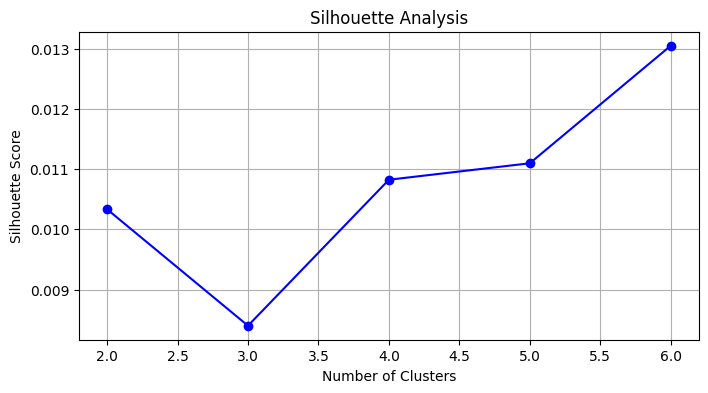

Optimal Number of Clusters: 6


In [ ]:
# Menampilkan plot Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)
plt.show()

# Memilih jumlah kluster dengan Silhouette Score tertinggi
optimal_num_clusters = range_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal Number of Clusters: {optimal_num_clusters}')


##K-Means Clustering

In [ ]:
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)


df_copy['Cluster'] = kmeans.labels_
df_copy.sample(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-115-9d9f74004bec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Cluster'] = kmeans.labels_


,Authors,Title,Abstract,DocumentType,Cluster
750,Stiff J.; Lenkeit J.; Hopfenbeck T.N.; Kayton ...,Research engagement in the Progress in Interna...,progress intern read literaci studi pirl world...,Review,3
3300,Kaswan M.S.; Kumar V.; Kumar P.,Lean work management through exploration and i...,continu explor perform lean metric provid real...,Article,0
5752,Rosinger K.; Ortagus J.; Kelchen R.; Choi J.,The Impact of Performance Funding Policy Desig...,studi draw comprehens performancebas fund pbf ...,Article,0
6603,Nunoo J.; Taale F.; Sebu J.; Adama A.S.Y.,Influence of teacher absenteeism and school di...,cognit skill import predictor academ success w...,Review,4
1152,Chen H.; Ward P.A.S.,The Value of Time Extensions in Identifying St...,instructor often grant student extens grace da...,Conference paper,0
5543,Al-Alawi A.I.; Alsubaiee N.M.A.,Predicting Student's Academic Performance Usin...,purpos studi identifi promin method use data m...,Conference paper,5
3195,Silva M.G.S.; De Almeida Alves R.C.; de Araújo...,Active Methodology and Digital MKT: experience...,work describ construct process seriou game app...,Conference paper,0
578,Burbage A.K.; Glass C.R.,The Evolving Identities of HSI and Differentia...,achiev higher educ act titl v fund goal policy...,Article,0
2702,Paksi B.; Széll K.; Fehérvári A.,Empirical Testing of a Multidimensional Model ...,educ system work reduc dropout risk therebi re...,Article,4
5491,Kaspar K.; Burtniak K.; Rüth M.,Online learning during the Covid-19 pandemic: ...,univers student face unexpect challeng onlin l...,Article,1


In [ ]:
df_copy['Cluster'].unique()

array([1, 0, 4, 5, 2, 3], dtype=int32)

In [ ]:
# Eksplorasi dan analisis topik dalam setiap kluster
for cluster_num in range(num_clusters):
    # Pilih dokumen yang termasuk dalam kluster ini
    cluster_documents = df_copy[df_copy['Cluster'] == cluster_num]['Abstract']

    # Ekstraksi kata kunci dari kluster ini (misalnya, 10 kata kunci teratas)
    top_keywords = tfidf_vectorizer.get_feature_names_out()[tfidf_matrix[df_copy['Cluster'] == cluster_num].sum(axis=0).argsort()[0, ::-1][:10]]

    # Mengonversi setiap elemen dalam array numpy menjadi string dan menggabungkannya
    top_keywords_str = ', '.join(map(str, top_keywords.tolist()))

    # Tampilkan kata kunci dan teks utama yang mewakili kluster ini
    print(f"Cluster {cluster_num + 1} - Top Keywords: {top_keywords_str}")
    print("Example Documents:")
    for i, text in enumerate(cluster_documents.sample(3)):
        print(f"Document {i + 1}: {text}\n")

    print("="*50)


Cluster 1 - Top Keywords: ['use', 'group', 'studi', 'assess', 'educ', 'skill', 'test', 'teacher', 'research', 'learn', 'particip', 'develop', 'result', 'effect', 'evalu', 'differ', 'score', 'design', 'practic', 'cours', 'train', 'teach', 'program', 'system', 'task', 'data', 'improv', 'experi', 'univers', 'medic', 'method', 'feedback', 'provid', 'analysi', 'cognit', 'process', 'two', 'languag', 'activ', 'knowledg', 'author', 'measur', 'examin', 'work', 'level', 'find', 'present', 'time', 'approach', 'music', 'clinic', 'show', 'higher', 'includ', 'intervent', 'control', 'compar', 'also', 'model', 'signific', 'respons', 'problem', 'base', 'scienc', 'school', 'simul', 'inform', 'commun', 'question', 'instruct', 'mathemat', 'one', 'strategi', 'impact', 'understand', 'abil', 'identifi', 'compet', 'three', 'investig', 'think', 'indic', 'tool', 'associ', 'paper', 'rate', 'increas', 'support', 'applic', 'exam', 'posit', 'need', 'technolog', 'grade', 'year', 'individu', 'complet', 'relat', 'gene

In [ ]:
for cluster_num in range(num_clusters):
    # Pilih dokumen yang termasuk dalam kluster ini
    cluster_documents = df_copy[df_copy['Cluster'] == cluster_num]['Abstract']

    # Ekstraksi kata kunci dari kluster ini (misalnya, 10 kata kunci teratas)
    top_keywords = tfidf_vectorizer.get_feature_names_out()[tfidf_matrix[df_copy['Cluster'] == cluster_num].sum(axis=0).argsort()[0, ::-1][:10]]

    # Mengonversi setiap elemen dalam array numpy menjadi string dan menggabungkannya
    top_keywords_str = ', '.join(map(str, top_keywords.tolist()))

    # Menampilkan "the most popular topic" dalam kluster
    print(f"Cluster {cluster_num + 1} - Top Keywords: {top_keywords_str}")


Cluster 1 - Top Keywords: ['use', 'group', 'studi', 'assess', 'educ', 'skill', 'test', 'teacher', 'research', 'learn', 'particip', 'develop', 'result', 'effect', 'evalu', 'differ', 'score', 'design', 'practic', 'cours', 'train', 'teach', 'program', 'system', 'task', 'data', 'improv', 'experi', 'univers', 'medic', 'method', 'feedback', 'provid', 'analysi', 'cognit', 'process', 'two', 'languag', 'activ', 'knowledg', 'author', 'measur', 'examin', 'work', 'level', 'find', 'present', 'time', 'approach', 'music', 'clinic', 'show', 'higher', 'includ', 'intervent', 'control', 'compar', 'also', 'model', 'signific', 'respons', 'problem', 'base', 'scienc', 'school', 'simul', 'inform', 'commun', 'question', 'instruct', 'mathemat', 'one', 'strategi', 'impact', 'understand', 'abil', 'identifi', 'compet', 'three', 'investig', 'think', 'indic', 'tool', 'associ', 'paper', 'rate', 'increas', 'support', 'applic', 'exam', 'posit', 'need', 'technolog', 'grade', 'year', 'individu', 'complet', 'relat', 'gene

In [ ]:
# Eksplorasi dan analisis topik dalam setiap kluster
cluster_labels = []  # List untuk menyimpan label kluster

for cluster_num in range(num_clusters):
    # Pilih dokumen yang termasuk dalam kluster ini
    cluster_documents = df_copy[df_copy['Cluster'] == cluster_num]['Abstract']

    # Ekstraksi kata kunci dari kluster ini (misalnya, 10 kata kunci teratas)
    top_keywords = tfidf_vectorizer.get_feature_names_out()[tfidf_matrix[df_copy['Cluster'] == cluster_num].sum(axis=0).argsort()[0, ::-1][:10]]

    # Mengonversi setiap elemen dalam array numpy menjadi string dan menggabungkannya
    top_keywords_str = ', '.join(map(str, top_keywords.tolist()))

    # Menyimpan "the most popular topic" sebagai label kluster
    cluster_labels.append(top_keywords_str)

# Menambahkan label kluster ke DataFrame
df_copy['Cluster_Label'] = [cluster_labels[label] for label in df_copy['Cluster']]

# Menampilkan DataFrame dengan label kluster
df_copy.sample(10)


<ipython-input-123-0c835498a1fc>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Cluster_Label'] = [cluster_labels[label] for label in df_copy['Cluster']]


,Authors,Title,Abstract,DocumentType,Cluster,Cluster_Label
4466,Irie N.; Morijiri Y.; Yoshie M.,Symptoms of and coping strategies for music pe...,music perform anxieti mpa manifest mental phys...,Article,0,"['use', 'group', 'studi', 'assess', 'educ', 's..."
4603,Gao J.; Li G.; Yang Z.; Li F.; Wang T.; Wen S.,The effect of working memory updating training...,object studi aim explor effect work memori upd...,Article,2,"['write', 'feedback', 'group', 'efl', 'languag..."
2703,Ragazou V.; Karasavvidis I.,Considering visual cueing and practice type fo...,purpos softwar train new trend softwar applic ...,Article,0,"['use', 'group', 'studi', 'assess', 'educ', 's..."
143,Chien Y.-H.; Chang F.-Y.,An importance-performance analysis of teachers...,increas worldwid trend toward develop scienc t...,Article,0,"['use', 'group', 'studi', 'assess', 'educ', 's..."
903,Poonputta A.,The Impact of Project-Based and Experiential L...,present studi aim explor effect integr project...,Article,1,"['learn', 'onlin', 'teach', 'educ', 'cours', '..."
2477,Kong E.H.,INCORPORATING PARTIAL STUDENT SELF-GRADING MOD...,letter grade system educ wide accept strong me...,Article,1,"['learn', 'onlin', 'teach', 'educ', 'cours', '..."
1352,Viegas C.; Lima N.; Costa A.R.,Engineering Students’ Perception on Self-Effic...,world experienc global chang everyon daili liv...,Article,4,"['academ', 'school', 'studi', 'social', 'educ'..."
2179,Hou Y.; Zhang Y.; Liu Y.; Yuan H.; Lei X.,Mindfulness Profiles Among Chinese University ...,object studi investig latent profil mind sampl...,Article,0,"['use', 'group', 'studi', 'assess', 'educ', 's..."
6372,Ferrara P.-M.M.; Zakrajsek R.A.; Eckenrod M.R....,Exploring former NCAA Division I college athle...,research found former collegi athlet fca exhib...,Article,0,"['use', 'group', 'studi', 'assess', 'educ', 's..."
611,Suherman S.; Suhendra A.; Ernastuti E.,Method Development Through Landmark Point Extr...,examin physic movement student educ quest hold...,Article,1,"['learn', 'onlin', 'teach', 'educ', 'cours', '..."
